In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os


- SVD is one of the most important skills in Machine Learning.  Since data is not only often messy, features in raw data sets can be too numerous to realistically work with.  Single Value Decomposition is a method of matrix decomposition that is the foundation of Principle Compenent Analysis (PCA). which functions to retain the signal of a dataset while reducing dimensionality (and noise).  It is more computationally efficient to not only work with lower dimension data, but it is often easier to represent and explain.  PCA is incredibly important for statistical analysis of data to understand the primary features contributing to variance.  
- In mathematics, there have been many devlopments and improvements to SVD and PCA methods to reduce the error involved in the matrix mathematics, given the context of the data.  Analytical solutions to problems in mathematics frequently require numerical anlaysis so that computation can occur.  Since these are approximations there are varying degrees of error that may or may not be acceptable in case use.  
- 

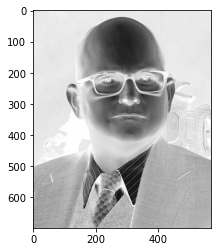

In [68]:
# Convert from RGB to grayscale using matplotlib and convert image to array

orig = plt.imread("/Users/tk/ASU/MAT421/data/collin.jpeg")
X = np.mean(orig, -1)

img = plt.imshow(256-X)
img.set_cmap('gray')
plt.show()

In [70]:
# Take the SVD of the image (economy SVD)
# SVD works by taking our original n by m matrix and decomposing it into just the first number of rows and columns that contribute the most 
# "information" or variance of the data.  
U,S,V = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [71]:
# show dimensions of U, S, V matrices 

print(U.shape, S.shape, V.shape)

(698, 570) (570, 570) (570, 570)


<Figure size 1152x576 with 0 Axes>

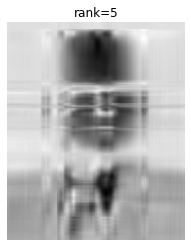

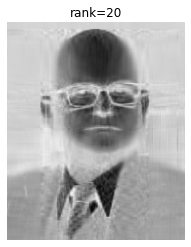

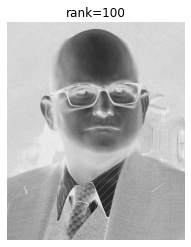

In [72]:
# using different ranks, show the matrix approximation
# each pictures represents a rank = i approximation of the image (n by m) matrix using the U, S, V matrices 
r = 0
plt.figure(figsize = (16, 8))
for i in (5,20,100):
  approx = U[:,:i] @ S[0:i,:i] @ V[:i,:]
  plt.figure(r+i)
  r += 1
  img = plt.imshow(256-approx)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('rank=' + str(i))
  plt.show()
 

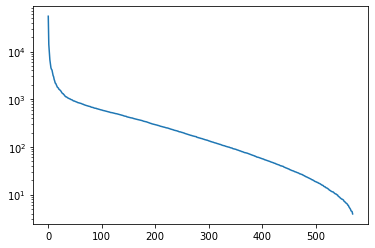

<module 'matplotlib.pyplot' from '/Users/tk/opt/miniconda3/envs/data-science-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [74]:
# show a plot of the singular values (the log of the singular values or diagonal values of the S matrix vs the number of singular values) for the image
# provides a visual of how we only need the singular values with the greatest value (they contribute the most information to constructing the image)
# gives an idea for ideal truncation

plt.figure(1)
plt.semilogy(np.diag(S))
plt.show()

In [79]:
from sklearn.decomposition import PCA

/Users/tk/opt/miniconda3/envs/data-science-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

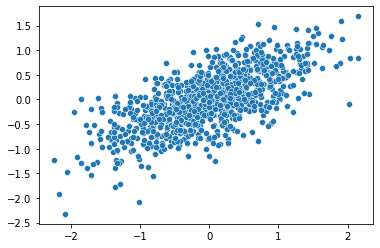

In [119]:
# PCA uses the SVD matrices to work in much lower dimensions than the original data set, which may have thousands (or more) samples for each 
# variable, resulting in very high, cumbersome dimensions.  PCA is an unsupervised machine learning algorithm that uses linear transformations
# of the data, showing the most variance in the prinicple components (using the rank columns that consist of most of the information).
# PCA is particulary important in computational molecular biology when looking at gene similarities and difference in different subjects

# Using toy data, randomly generated 1000 points in a 2 dimensional matrix
rng = np.random.RandomState(123)
X = np.dot(rng.rand(2,2), rng.randn(2,1000)).T
sns.scatterplot(X[:,0],X[:,1])

In [86]:
# there is a clear linear relationship and we could use linear regression to predict yhat, howeverPCA is interested 
# in the relationships in the data that leads to degrees of variance

# Using PCA from sklearn to compare to numpy

# This can also be preformed manually (see iris data set below)

pca = PCA(n_components=2)
pca.fit(X)
print(type(pca))
pca

<class 'sklearn.decomposition._pca.PCA'>


PCA(n_components=2)

In [92]:
# Components from PCA - directional vectors  with variance (s^2) as the magnitude squared of the vectors, note the orientation of the vectors

dvectors = pca.components_
dvectors

array([[-0.8250438 , -0.56506878],
       [ 0.56506878, -0.8250438 ]])

In [136]:
# there is quite a bit of data that can be pulled out of the pca model, use dir() to see the list of attributes and methods for am
# object in python

print(dir(pca))

s2 = pca.explained_variance_
s2

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_fit', '_fit_full', '_fit_svd_solver', '_fit_truncated', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'components_', 'copy', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_covariance', 'get_params', 'get_precision', 'inverse_transform', 'iterated_power', 'mean_', 'n_components', 'n_components_', 'n_features_', 'n_features_in_', 'n_samples_', 'noise_variance_', 'random_state', 'score', 'score_samples', 'set_params', 'singular_values_', 'svd_solver', 't

array([0.74586039])

In [137]:
# saving the mean from the pca model to a variable as this will be useful when plotting the vectors on the data

xbar = pca.mean_

(-2.4743435777680483,
 2.374292251514872,
 -2.525801756584101,
 1.8910138989301923)

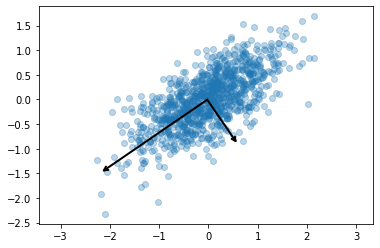

In [99]:
# plot the vectors layered on the data

def comp_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(s2, dvectors):
    v = vector * 3 * np.sqrt(length)
    comp_vector(xbar, xbar + v)
plt.axis('equal')

(-5.0, 5.0)

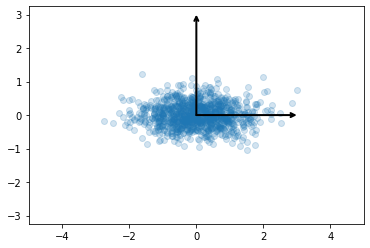

In [108]:
# The priciple components of the data are projected onto the principle axes, represented by the vectors in black
# Compare to the data before projection
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
comp_vector([0, 0], [0, 3])
comp_vector([0, 0], [3, 0])
plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)

In [111]:
# a simple example of dimension reduction for our toy datase: we reduce from 2 dimensions to 1 dimension using PCA
# a simple visualization using toy data makes the model concepts easier to intially understand.  However, this is normally
# performed on many more dimensions and thorough data preparation is necessary for the data to be appropriately run using 
# PCA

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original:", X.shape)
print("transformed:", X_pca.shape)

original: (1000, 2)
transformed: (1000, 1)


(-2.752227074856436,
 2.4864687071346054,
 -2.525801756584101,
 1.8910138989301923)

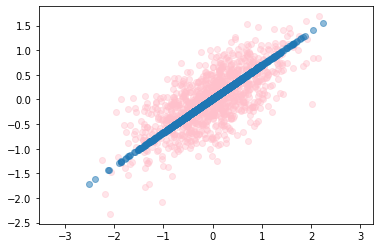

In [116]:
# pink markers are the original data and the blue data on the linear axis

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4,c="pink")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5)
plt.axis('equal')

In [140]:
# manually coded PCA for the infamous Iris dataset.  It's a well known data set so we know if our calculations look incorrect, it's 
# good next step after using randomly generated toy data.

# Import the Iris dataset and convert to a Data Frame
import sklearn.datasets

iris = sklearn.datasets.load_iris()

# dataset description
print(iris.DESCR)

# Make a DataFrame with a species column
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]

# Take a look: we have numeric values for our features and strings for labels.
df_iris.head()


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


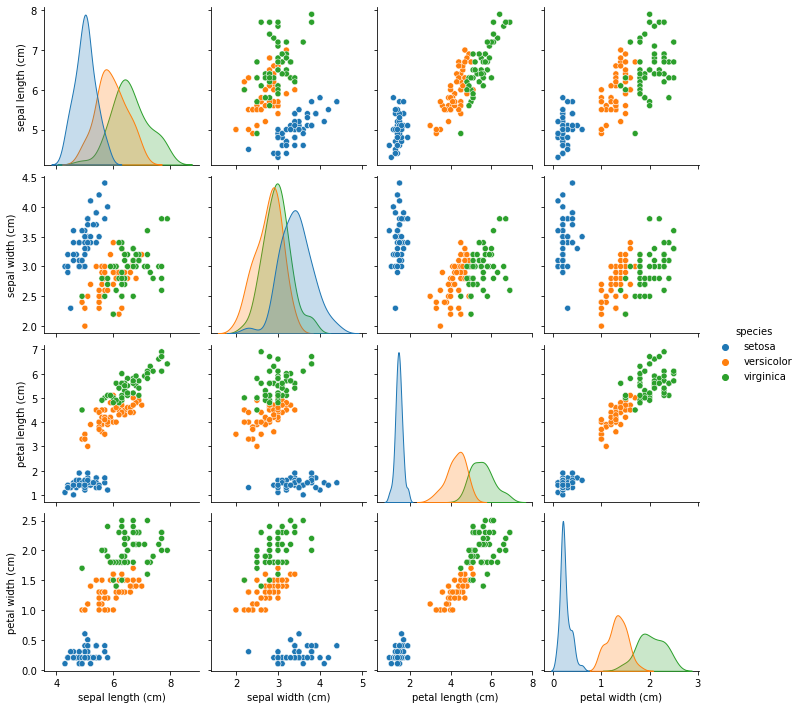

In [126]:
# Plot a covariance matrix visualization to immediate identify relationships bewtween species based on different characteristics
# this is a similar procedure in EDA for basic linear regression

sns.pairplot(df_iris, hue='species')

In [127]:
# center the data about the mean

df_cent = df_iris.loc[:, ['petal length (cm)', 'petal width (cm)']]
for col in df_cent.columns:
    df_cent[col] -= df_cent[col].mean()

In [129]:
# compute covariance matrix in numpy

cov_m = np.cov(m=df_cent.transpose())
cov_m

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [131]:
# manually performed eigenvalue decomposition o fthe covariance matrix, where the eigenvalues of the matrix give the direction of the PCA compeenents
# and the eigenvalues give the magnitude of the prinicple compoenent vectors

# we clearly see two prinicple components

eig_vals, eig_vecs = np.linalg.eig(cov_m)

print('Eigenvectors\n', eig_vecs)
print('\nEigenvalues\n', eig_vals)


Eigenvectors
 [[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]

Eigenvalues
 [3.66123805 0.03604607]


In [133]:
# Even though the principle vectors are 1 dimensional, you can see that PCA 1 still retains enough information to explain 99% of the variance
# of the dataset

print("""
PCA 1: {0:.2f}% of the variance
PCA 2:  {1:.2f}% of the variance
""".format(*tuple(eig_vals / eig_vals.sum() * 100)))


PCA 1: 99.03% of the variance
PCA 2:  0.97% of the variance

